# <center> General Social Survey
## <center> From the National Archive of Data on Arts & Culture
###    <center>by Luis Marquez

The present capstone is based in a general social survey realized by the University of Chicago on behalf of the National Data Program for the Social Sciences in March of 2012 supervised by Tom W. Smith from the National Opinion Research Center, Peter V. Marsden from the National Opinion Research Center and Michael Hout from the National Opinion Research Center.

The General Social Survey (GSS) is a collection of data from the general public; the collection was based in more than 1060 merged variables including attitudes toward social issues, religion, education, jobs, economy, government and other institutions, politics, and policy issues.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline

The data is in a CSV file (35478-0001-Data.csv) with 4820 rows and  1069 columns that are going to be of use to create a line of information about the user that left the information.

In [2]:
data = pd.read_csv('35478-0001-Data.csv')

In [3]:
df = pd.DataFrame(data)

#### What is the sex distribution of the respondents?

The information is saved in the variable SEX that uses two values, 1 for male and 2 for female.

In [4]:
data.SEX.value_counts(ascending=True)

1    2132
2    2688
Name: SEX, dtype: int64

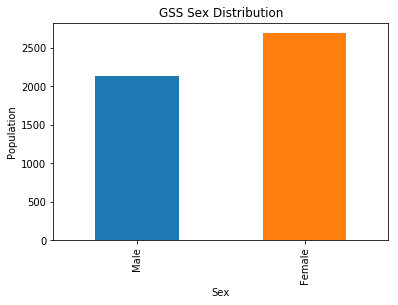

In [5]:
data.SEX.value_counts(ascending=True).plot(kind='bar', )
plt.title('GSS Sex Distribution')
plt.ylabel('Population')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

The GSS indicates that 2132(44%) respondents were male and 2688(56%) females of the population.

#### What is the race distribution of the respondents?

The information is saved in the variable RACE that uses three values, 1 for white, 2 for black and 3 for other.

In [6]:
data.RACE.value_counts(ascending=False)

1    3700
2     722
3     398
Name: RACE, dtype: int64

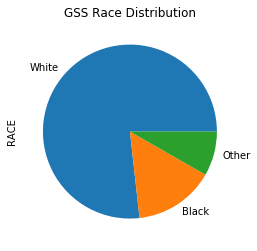

In [7]:
data.RACE.value_counts(ascending=False).plot(kind='pie', labels= ('White', 'Black', 'Other'))
plt.title('GSS Race Distribution')
plt.show()

The GSS indicates that 3700(77%) respondents were white, 722(15%) black and 398(8%) in other of the population.

#### What population received college degree education?

The information is saved in the variable WHENCOL that uses years values from , 0 as inapplicable, 9998 as don't know and 9999 as no answer.

In [8]:
((data.WHENCOL !=0 ) & (data.WHENCOL !=9998) & (data.WHENCOL !=9999) ).sum()

700

The total amount of the population with a college degree education is 700 from 4820 respondents.

#### Show the distribution for the top 35 years of more college graduates.

In [9]:
data.WHENCOL.sort_values().unique()

array([   0, 1938, 1947, 1948, 1949, 1950, 1951, 1952, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       9998, 9999], dtype=int64)

The range value of the years within the college graduation year of the respondents is from 1938 to 2012.

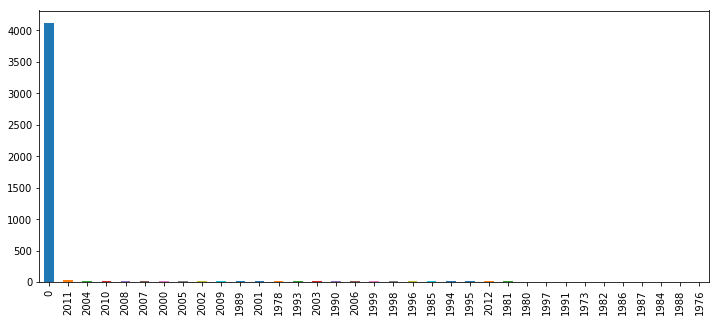

In [10]:
data.WHENCOL.value_counts().head(35).plot(kind='bar', figsize=(12,5))
plt.show()

Because the value 0 have the most significant value is vital to take that value out to get the contents of the years with more college graduates.

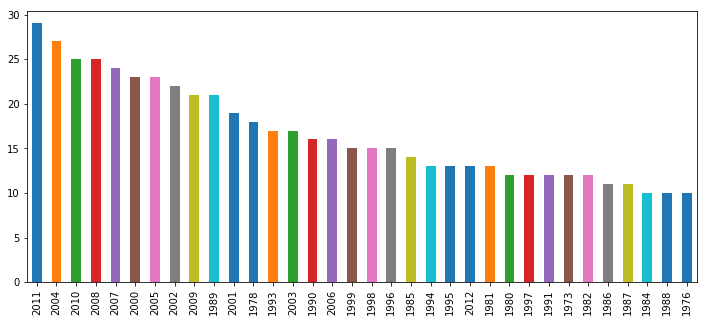

In [11]:
data.WHENCOL.value_counts().head(35)[1:].plot(kind='bar', figsize=(12,5))
plt.show()

The graphic shows a progressive increment of college graduates, 2011 was the year with more graduations of the respondents, and 2012 is in the 23rd place, maybe because the survey was taken in the middle of the year.

#### Distribution of race of the college graduates?

In [12]:
df_range = df[(df['WHENCOL'] >= 1938) & (df['WHENCOL'] <= 2012)]

In [13]:
df_range.RACE.value_counts(ascending=False)

1    551
2     82
3     67
Name: RACE, dtype: int64

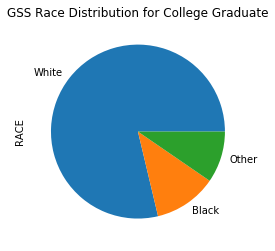

In [14]:
df_range.RACE.value_counts(ascending=False).plot(kind='pie', labels= ('White', 'Black', 'Other'))
plt.title('GSS Race Distribution for College Graduate')
plt.show()

From the 700 college graduates 551(78%) respondents are white, 82(12%) are black and 67(10%).

#### What is the marital status distribution of the college graduates?

The information is saved in the variable MARITAL that uses value 1 for married, 2 for widowed, 3 for divorce, 4 for separated and 5 for never married.

In [15]:
df_range.MARITAL.value_counts(sort=False)

1    379
2     45
3    100
4     21
5    155
Name: MARITAL, dtype: int64

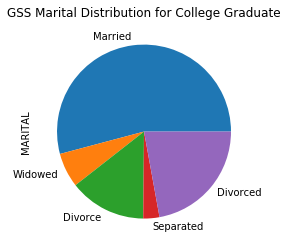

In [16]:
df_range.MARITAL.value_counts(sort=False).plot(kind='pie', labels= ('Married', 'Widowed', 'Divorce', 'Separated', 'Divorced'))
plt.title('GSS Marital Distribution for College Graduate')
plt.show()

The distribution fo the marital status of the college graduates is as follow: 379(54%) merried, 155(22%) never merried, 100(14%) divorced, 45(7%) windowed and 21(3%) separated.

#### Sex distribution on college graduated population?

In [17]:
df_range.SEX.value_counts(ascending=True)

1    316
2    384
Name: SEX, dtype: int64

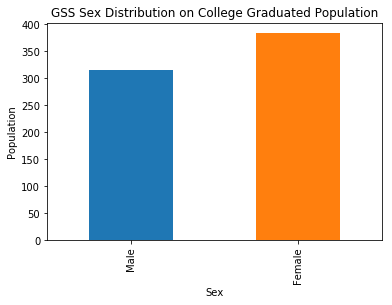

In [18]:
df_range.SEX.value_counts(ascending=True).plot(kind='bar', )
plt.title('GSS Sex Distribution on College Graduated Population')
plt.ylabel('Population')
plt.xlabel('Sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

The sex distribution for college graduation indicates that 316(45%) respondents were male and 384(54%) females.

#### How similar is the sex distribution from the total population vs. the college graduate?

In [19]:
df.SEX.mean()

1.5576763485477179

In [20]:
df_range.SEX.mean()

1.5485714285714285

In [21]:
df.SEX.std()

0.4967138275708143

In [22]:
df_range.SEX.std()

0.4979910591905458

In [23]:
diff = df.SEX.mean() - df_range.SEX.mean()
diff

0.009104919976289372

In [24]:
size = np.array([len(df.SEX), len(df_range)])
size

array([4820,  700])

In [25]:
sd = np.array([df.SEX.std(), df_range.SEX.std()])
sd

array([0.49671383, 0.49799106])

In [26]:
diff_se = (sum(sd**2 / size))** 0.5
diff_se

0.020136195992230363

In [27]:
t_value_original = (diff / diff_se)
t_value_original

0.45216683328879714

In [28]:
ttest_ind(df.SEX, df_range.SEX, equal_var=False)

Ttest_indResult(statistic=0.4521668332887972, pvalue=0.6512562277838481)

### Conclusion

The General Social Survey (GSS) is a collection of data from the general public formed with 1060 rows of variables and 4820 respondents. The topics of the survey comprehend several areas of interest, from attitudes toward social issues, religion, education, jobs, economy, politics, policy issues in government and other institutions.

One of the interests of the research was to know the total population of the sex and race distribution of the respondents. The result gives a majority to the female's population with 56% percent over 44% of the male respondents. In the race distribution, the dominant respondents were the white race with 77% of presence followed by the black population with 15% and finally by other communities with 8% of participation.

From the 4820 respondents of the survey, only 700 (about 15%) of the population have a college degree. The earlier year of a respondent with a college degree was from 1938 with a steady increment of participants as years increased. 2011 was the year with more college graduates; it is essential to keep in mind the survey collected the information in March of 2012 giving the 23rd position to the number of college graduates to the year 2012.

Within the college graduates respondents, sex and distribution of information was analyzed and found that the population distribution in sex was dominant by females with 54% of the population and males with 45%. In the race distribution of the college alumni, the white population was the most significant group with 78% of the people, followed by the black community with 12% and others with only 10% of the population.

Finally, an analysis of how significative the sex distribution was from the total population survey vs. the college graduates was realized with the following conclusion. The difference between the average of the two groups was small, indicating a high similitude of the two groups of information with a combine of variances of 2% between the two groups. The p-value is of 0.65 meaning the result is statistically significant for the main survey sex distribution group to influence the results of the sex distribution of college graduate group.

#### Reference

<i>Smith, Tom W., Marsden, Peter V., and Hout, Michael. General Social Survey, 2012 Merged Data, Including a Cultural Module [United States]. Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2016-05-26. https://doi.org/10.3886/ICPSR35478.v4